<a href="https://colab.research.google.com/github/OskarBelza/ML-DL/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przygotwanie i analiza danych

## Pobieranie bazy

In [ ]:
#instalacja pakietu gdown
!pip install -U --no-cache-dir gdown --pre
#usuwanie i tworzenie pustego katalogu data
!rm -rf data && mkdir data
#pobieranie zip-a ze zdjęciami
!gdown 1IZqtYwHs6b_7wjdmu637Y1mbSxgSPHSZ -O titanic.zip
#rozpakowywanie pliku titanic.zip do katalogu data
!unzip -q titanic.zip -d data

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1IZqtYwHs6b_7wjdmu637Y1mbSxgSPHSZ
To: /content/titanic.zip
100% 33.8k/33.8k [00:00<00:00, 39.6MB/s]


## Wczytanie bibliotek

In [ ]:
!pip install scikeras
!pip install scikit-optimize
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 23.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


import tensorflow as tf
from tensorflow.keras import layers, models

## Wczytanie danych

In [ ]:
# Wczytanie danych testowych i trenujących
test = pd.read_csv('data/Titanic/test.csv')
train = pd.read_csv('data/Titanic/train.csv')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analiza podstawowych statystyk

### Liczba obserwacji i cech

In [ ]:
# Liczba obserwacji dla danych trenujących
print(len(train))

# Liczba cech
print(len(train.columns))

891
12


In [ ]:
# Liczba obserwacji dla danych testowych
print(len(test))

# Liczba cech dla danych testowych
print(len(test.columns))

418
11


### Statystyki opisowe

In [ ]:
# Statystyki takie jak mediana, odchylenie itp dla danych trenujących
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Statystyki takie jak mediana, odchylenie itp dla danych testowych
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Brakujace dane

In [ ]:
# Liczba brakujacyh komorek w każdej z kolumn dla danych trenujacych
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Liczba brakujacyh komorek w każdej z kolumn dla danych testowych
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Duplikaty

In [ ]:
# Liczba zduplikowanych komórek dla danych trenujacych
train.duplicated().sum()

0

In [ ]:
# Liczba zduplikowanych komórek dla danych testowych
test.duplicated().sum()

0

## Przygotowanie Danych

### Wyciągnięcie tytułu

In [ ]:
pat = r",\s([^ .]+)\.?\s+"

train['Title'] =  train['Name'].str.extract(pat,expand=True)[0]
test['Title'] =  test['Name'].str.extract(pat,expand=True)[0]

In [ ]:
# Najczesciej wystepujace tytuły
value_counts_train = train['Title'].value_counts()
value_counts_train

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
the           1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [ ]:
# Najczesciej wystepujace tytuły
value_counts_test = test['Title'].value_counts()
value_counts_test

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [ ]:
# Usuniecie pojedynczych tytułów
# Wartości, które występują mniej niż 10 razy
values_to_replace = value_counts_train[value_counts_train < 10].index.tolist()

# Zastąpienie wartości, które występują mniej niż 10 razy, tekstem "inny"
train.loc[train['Title'].isin(values_to_replace), 'Title'] = 'inny'

In [ ]:
# Usunięcie pojedynczych tytułów
# Wartości, które występują mniej niż 5 razy
values_to_replace = value_counts_test[value_counts_test < 5].index.tolist()

# Zastąpienie wartości, które występują mniej niż 5 razy, tekstem "inny"
test.loc[test['Title'].isin(values_to_replace), 'Title'] = 'inny'

### Uzupełnienie wartości brakujących

In [ ]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


#### Wiek

In [ ]:
# Wiek jako że mamy dużo wartości brakujących zdecydowałem się go uzupełnić na podstawie mediany wartości
age = train['Age'].median()
train.Age = train['Age'].fillna(age)

age = test['Age'].median()
test.Age = test['Age'].fillna(age)

#### Fare

In [ ]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [ ]:
# Jako ze brakujaca wartość Fare jest tylko jedna przyjmiemy strategie że sprawdzimy najbardziej skorelowane cechy
# i uzupełnimy na ich podstawie
columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
test[columns].corr()['Fare'].abs().sort_values(ascending=False)

Fare      1.000000
Pclass    0.577147
Age       0.347105
Parch     0.230046
SibSp     0.171539
Name: Fare, dtype: float64

In [ ]:
# Wybrałem kolumne Pclass i Age jako te z największą korelacją oraz dodałem płeć żeby trochę zawężyć wyniki
# Wiek uśredniłem do powyżej 50 lat a jako próbe wziałem dane trenujące jako że jest ich więcej
filtered_data = train[(train['Pclass'] == 3) & (train['Age'] > 50) & (train['Sex'] == 'male')]
average_fare = filtered_data['Fare'].mean()
average_fare

7.518522222222223

In [ ]:
test.Fare[test['Fare'].isnull()] = average_fare

<ipython-input-18-63e93baabf42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Fare[test['Fare'].isnull()] = average_fare


#### Embarked

In [ ]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [ ]:
# Z Embarked zrobimy podobnie jak z Fare
columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', '_Embarked']

# Konwertujemy chwilowo kolumne embarked na liczby
# W pożniejszej części zrobimy to juz na stałe
train['_Embarked'] = pd.Categorical(train.Embarked).codes
train[columns].corr()['_Embarked'].abs().sort_values(ascending=False)

_Embarked    1.000000
Fare         0.230365
Survived     0.176509
Pclass       0.173511
SibSp        0.071480
Parch        0.043351
Age          0.031903
Name: _Embarked, dtype: float64

In [ ]:
# Wybrałem 3 kolumny z największą korelacja Fare, Survived oraz Pclass
# Dla Pclass i Survived wybrałem wartość odpowiadająca tym w brakujących wartościach
# Dla Fare wziąłem przedział od 50 do 100 (w brakujących 80) i policzyłem liczbę klas Embarked
filtered_data = train[(train['Pclass'] == 1) & (train['Survived'] == 1) & (train['Fare'] >= 50) & (train['Fare'] <= 100)]
filtered_data['Embarked'].value_counts()

Embarked
S    33
C    27
Q     1
Name: count, dtype: int64

In [ ]:
train.Embarked[train['Embarked'].isnull()] = 'S'

<ipython-input-22-721e1eabb943>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Embarked[train['Embarked'].isnull()] = 'S'


### Tokenizacja

In [ ]:
# Zmiana wartości opisowych jak płeć i port na wartości liczbowe dla zbioru trenującego
le = LabelEncoder()

train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.transform(test['Sex'])

train['Embarked'] = le.fit_transform(train['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])

train['Title'] = le.fit_transform(train['Title'])
test['Title'] = le.transform(test['Title'])

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,_Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,2


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,3


### Usuniecie zbednych kolumn

In [ ]:
# Usuwamy kolumny takie jak numer biletu czy imie jako że zawierają one unikalne wartości
# które nie pomogą w wytrenowaniu modelu
train = train.drop(['Ticket', 'Name', 'PassengerId', 'Cabin', '_Embarked'], axis=1)
test = test.drop(['Ticket', 'Name', 'PassengerId', 'Cabin'], axis=1)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2


## Wizualizacja

### Histogram cech

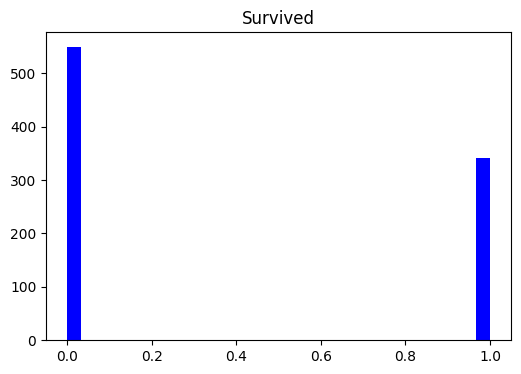

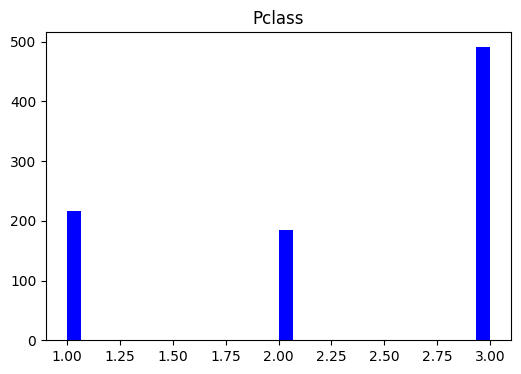

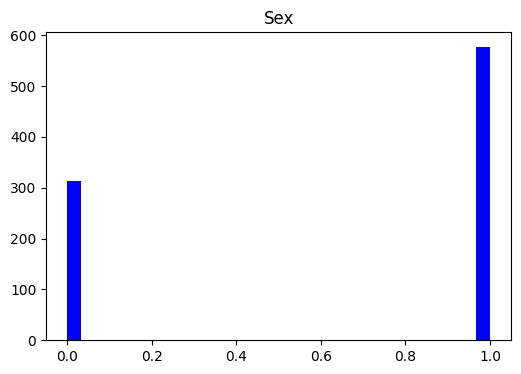

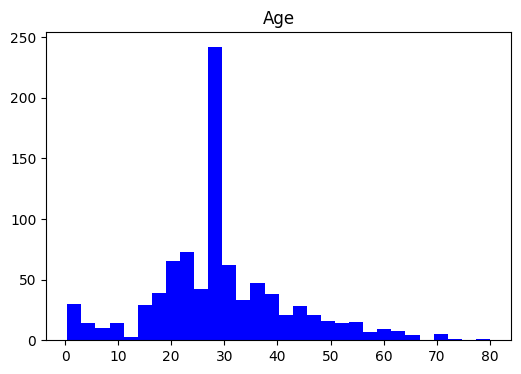

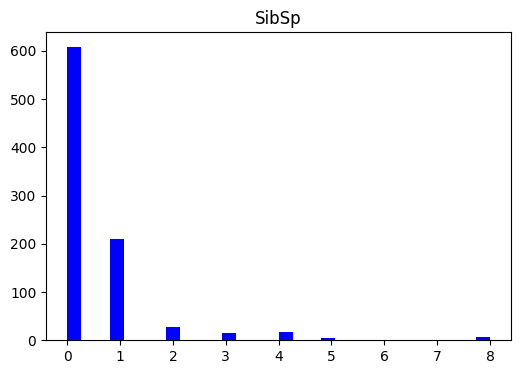

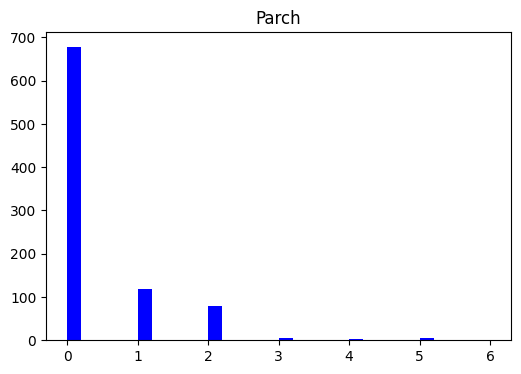

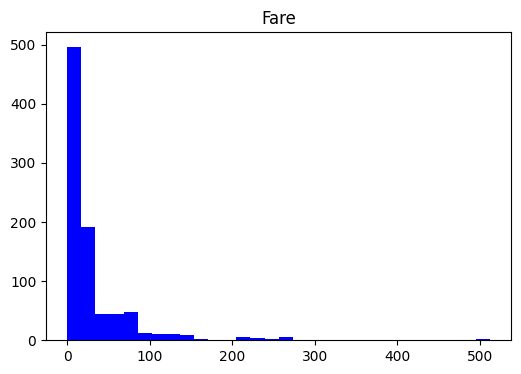

In [ ]:
# Wykresy histogramu każdej z cech
columns_to_plot = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
for column in columns_to_plot:
  plt.figure(figsize=(6,4))
  plt.hist(train[column], bins=30, color='blue')
  plt.title(column)
  plt.show()

### Macierz korelacji

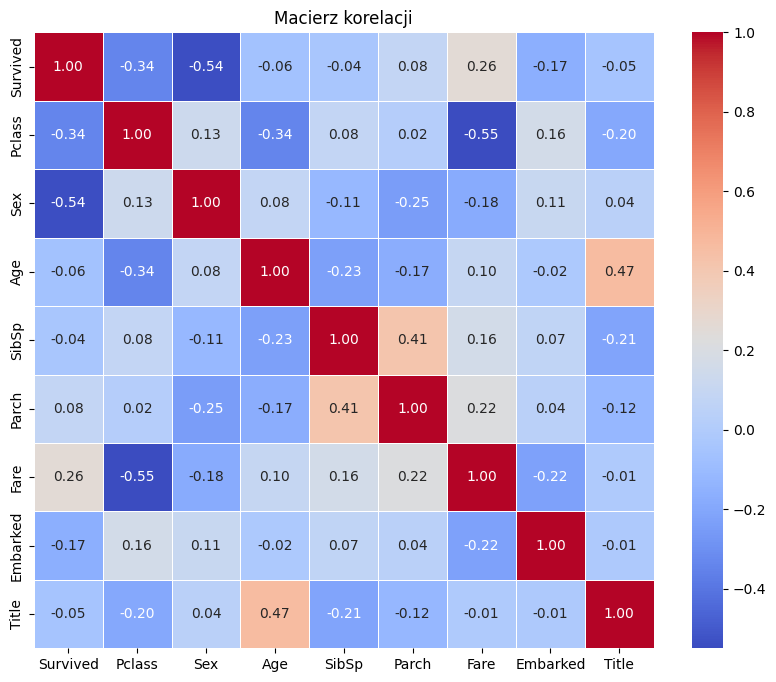

In [ ]:
# Stworzenie macierzy korelacji między cechami
correlation_matrix = train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

## Podział danych

In [ ]:
# Przypisanie cech wykorzytsanych do trenowania do zmiennej X
X = train.drop(['Survived'], axis=1)
# Przypisanie wyników do zmiennej Y
y = train['Survived']

In [ ]:
# Podział na dane testowe, trenujące i walidacyjne
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=12)

#Trenowanie i ocena modelu

### Pierwsze trenowanie

In [ ]:
num_layers = 3
num_neurons = [64, 32, 16]  # liczba neuronów w kolejnych warstwach

# Wybór funkcji aktywacji dla warstw ukrytych i wyjściowej
activation_hidden = 'relu'
activation_output = 'sigmoid'

# Określenie funkcji straty i optymalizatora
loss_function = 'binary_crossentropy'
optimizer = 'adam'

# Ustawienie parametrów treningowych (liczba epok, rozmiar partii)
epochs = 15
batch_size = 32

# Trenowanie modelu
model = models.Sequential()

# Dodanie warstw ukrytych
for i in range(num_layers):
  model.add(layers.Dense(num_neurons[i], activation=activation_hidden))

# Dodanie warstwy wyjściowej
model.add(layers.Dense(1, activation=activation_output))

# Kompilacja modelu
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Trenowanie modelu
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.4226 - loss: 1.9030 - val_accuracy: 0.6493 - val_loss: 0.7357
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6539 - loss: 0.7072 - val_accuracy: 0.6045 - val_loss: 0.6616
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6940 - loss: 0.6210 - val_accuracy: 0.6567 - val_loss: 0.6553
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7069 - loss: 0.5882 - val_accuracy: 0.6716 - val_loss: 0.6455
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7248 - loss: 0.5782 - val_accuracy: 0.6642 - val_loss: 0.6421
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7120 - loss: 0.5779 - val_accuracy: 0.6567 - val_loss: 0.6497
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7049 - loss: 0.5928 - val_accuracy: 0.6642 - val_loss: 0.6250
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7466 - loss: 0.5546 - val_accuracy: 0.6567 - val_lo

### Dostosowanie hiperparametrów

In [ ]:
# Funkcja tworząca model Keras
def create_model(num_layers=3, num_neurons=(64, 32, 16), activation_hidden='relu', optimizer='adam', loss_function='binary_crossentropy'):
    model = Sequential()
    for i in range(num_layers):
        model.add(Dense(num_neurons[i], activation=activation_hidden))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
    return model

# Funkcja trenująca model i zwracająca jego skuteczność na zbiorze walidacyjnym
def train_and_evaluate_model(X_train, y_train, X_val, y_val, **params):
    model = create_model(**params)
    model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=0)
    y_pred_prob = model.predict(X_val)
    y_pred = (y_pred_prob > 0.5).astype(int)  # przyjęcie progu 0.5
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy, model

# Definicja przestrzeni parametrów do przeszukania
param_grid = {
    'num_layers': [2, 3, 4],
    'num_neurons': [(32, 16, 8, 4), (64, 32, 16, 8), (128, 64, 32, 16), (256, 128, 64, 32)],
    'activation_hidden': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'loss_function': ['binary_crossentropy']
}

# Ustawiamy ziarno żeby zapewnić powtarzalność wyników
np.random.seed(42)
tf.random.set_seed(42)

# Przeszukiwanie siatkowe przestrzeni parametrów
best_accuracy = 0
best_params = None
best_model = None
for num_layers in param_grid['num_layers']:
    for num_neurons in param_grid['num_neurons']:
        for activation_hidden in param_grid['activation_hidden']:
            for optimizer in param_grid['optimizer']:
                for loss_function in param_grid['loss_function']:
                    params = {
                        'num_layers': num_layers,
                        'num_neurons': num_neurons,
                        'activation_hidden': activation_hidden,
                        'optimizer': optimizer,
                        'loss_function': loss_function
                    }
                    accuracy, model = train_and_evaluate_model(X_train, y_train, X_val, y_val, **params)
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = params
                        best_model = model

# Wyświetlenie najlepszych znalezionych parametrów
print("Best parameters found: ", best_params)
print("Best accuracy found: ", best_accuracy)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms

## Ocena modelu

In [ ]:
best_model.summary()

Model: "sequential_215"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_815 (Dense)                    │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_816 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_817 (Dense)                    │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,989 (414.02 KB)

 Trainable params: 35,329 (138.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 70,660 (276.02 KB)

In [ ]:
# Pobranie prawdopodobieństw predykcji modelu dla danych testowych
y_pred_prob = best_model.predict(X_test)

# Przekształcenie prawdopodobieństw na klasy za pomocą progu 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Ocena metryk
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 0.835820895522388
Precision: 0.8333333333333334
Recall: 0.7407407407407407
F1 Score: 0.7843137254901961
Confusion Matrix:
 [[72  8]
 [14 40]]


## Wnioski

Zbior Tytanic był ciekawym zbiorem do nauki, przede wszystkim pod względem przygotowania danych. Konieczność przerobienia wartości opisowych na liczbowe a także metody uzupełnienia danych pozwoliły mi rozbudować wiedzę na temat uczenia maszynowego. Jeśli zaś chodz o same uczenie maszynowe a w tym przypadku uczenie głębokie za pomocą sieci neuronowych jestem zawiedziony myślałem że uda uzyskać się lepsze wyniki niż accuracy średnio na poziomie 0,78 myślę że dobre byłoby tu wytrenowanie klasycznego modelu uczenia maszynowego żeby móc zestawić z sobą te wyniki zwłaszcza że sieci neuronowe są dużo bardziej zasobożerne niż klasyczne UM, myślę że dużo do poprawy jest też w optymalizacji hiperparametrów z racji na początek zabawy z tym tematem zdecydowałem się na dość proste podejście gdzie po prostu ręcznie przeszukiwałem "drzewo możliwości" z róznymi parametrami takimi jak liczba layerów w sieci liczba neronow czy funkcje aktywacji, na pewno można by to bardziej zoptymalizować lub wprowadzić bardziej zzawansowane modele jak GBT lecz myślę że na początek jest to dobre podejście pokazujące co faktycznie się tu dzieje